# Mathematical Underpinnings - Lab 4

In [1]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import pandas as pd

## Task 1

### a)

#### bp 1)

In [2]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs. 

In [3]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

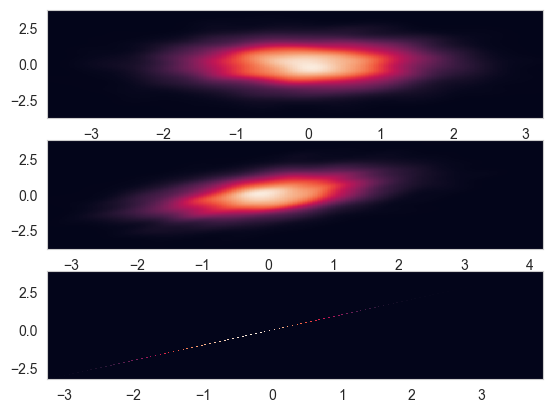

In [4]:
fig, axs = plt.subplots(3)

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [13]:
# pearsonr - Pearson correlation
# use sklearn.metrics.mutual_info_score although it is not the best option 
#       (as it takes max over permutations of classes of r.v. instead of computing one value and returning it)

In [14]:
from sklearn.metrics import mutual_info_score
from scipy.stats import pearsonr

In [60]:
n = 1000
rho_list = list(np.arange(0., 1.1, 0.1))
def generate_data(rho_list):
    data_list = []
    for rho in rho_list:
        data_list.append(np.random.multivariate_normal(np.zeros(2), np.array([[1, rho], [rho, 1]]), n))
    return data_list

def compute_p_and_m(data):
    x_bins = np.linspace(data[:,0].min(), data[:,0].max(), 10)
    y_bins = np.linspace(data[:,1].min(), data[:,1].max(), 10)
    x_discrete = np.digitize(data[:, 0], bins=x_bins)
    y_discrete = np.digitize(data[:, 1], bins=y_bins)
    m_info = mutual_info_score(x_discrete, y_discrete)
    pearson = pearsonr(data[:, 0], data[:, 1])
    return m_info, pearson

mut_inf_list = []
pearson_list = []
data_list = generate_data(rho_list)

for data in data_list:
    mut_info, pearson = compute_p_and_m(data)
    mut_inf_list.append(mut_info)
    pearson_list.append(pearson)
    

In [61]:
mut_inf_list

[0.02809229280209252,
 0.03721042664206145,
 0.05375707816358807,
 0.06943843847045957,
 0.12604171676337766,
 0.15152755754742936,
 0.2538671761758318,
 0.32274277245879657,
 0.43444319731201037,
 0.7002374274537513,
 1.784343623356074]

In [62]:
pearson_list

[PearsonRResult(statistic=0.09116622899471326, pvalue=0.003909987713675244),
 PearsonRResult(statistic=0.08921097286399587, pvalue=0.0047546751363649244),
 PearsonRResult(statistic=0.19859767284537572, pvalue=2.36473298682716e-10),
 PearsonRResult(statistic=0.2920423182483716, pvalue=4.1021855290670954e-21),
 PearsonRResult(statistic=0.4375216901289304, pvalue=5.1501969902831376e-48),
 PearsonRResult(statistic=0.5073555993315861, pvalue=1.5834161359909438e-66),
 PearsonRResult(statistic=0.6108396464118918, pvalue=2.5637811466608857e-103),
 PearsonRResult(statistic=0.7056643356394732, pvalue=1.662352591429368e-151),
 PearsonRResult(statistic=0.7842033070748584, pvalue=4.6412948328297216e-209),
 PearsonRResult(statistic=0.9043452206311362, pvalue=0.0),
 PearsonRResult(statistic=1.0, pvalue=0.0)]

#### bp 3)

In [63]:
N = 1000
ro_to_m_info_list = {rho_index: list() for rho_index in range(len(rho_list))}
ro_to_pearson_list = {rho_index: list() for rho_index in range(len(rho_list))}

for i in range(N):
    data_list = generate_data(rho_list)
    for idx, data in enumerate(data_list):
        mut_info, pearson = compute_p_and_m(data)
        ro_to_m_info_list[idx].append(mut_info)
        ro_to_pearson_list[idx].append(pearson.statistic)
        

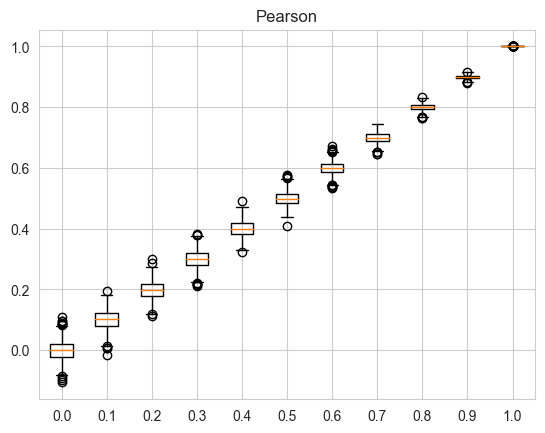

In [74]:
plt.title("Pearson")
plt.boxplot(ro_to_pearson_list.values(), vert=True, labels= np.round(rho_list, 1))
plt.show()

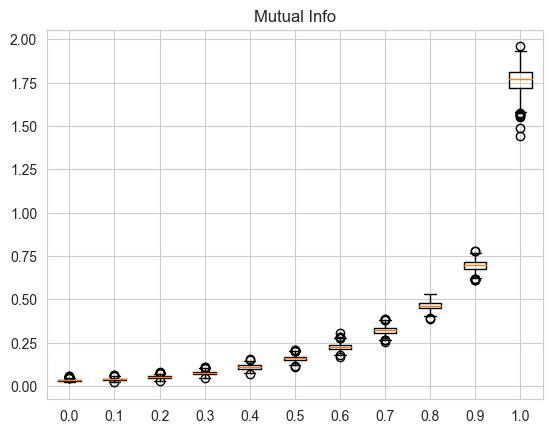

In [75]:
plt.title("Mutual Info")
plt.boxplot(ro_to_m_info_list.values(), vert=True, labels=np.round(rho_list, 1))
plt.show()

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

In [88]:
all_mi_list = []
for  mi_list in list(ro_to_m_info_list.values())[:-1]:
    all_mi_list.append(mi_list)

In [97]:
def caluculate_I(ro):
    I = - 0.5 * np.log(1 - ro*ro)
    return I

ro_to_ro_est = {}
ro_to_m_info = {}
N = 100

I_theory = [caluculate_I(rho) for rho in rho_list[:-1]]

I_from_pearson = []
full_pearson_list = []
for pearson_list in list(ro_to_pearson_list.values())[:-1]:
    full_pearson_list.extend(pearson_list)
    
I_from_pearson= [caluculate_I(per) for per in full_pearson_list]

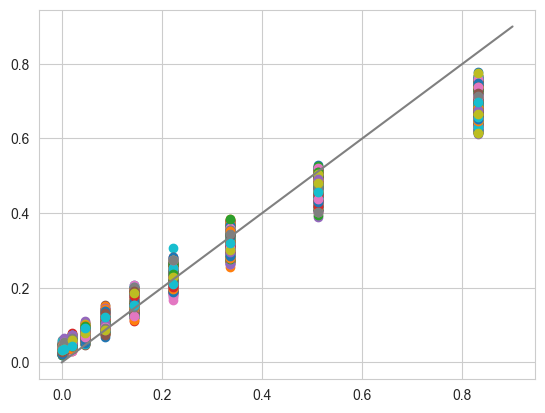

In [94]:
plt.plot(I_theory, all_mi_list, "o")
plt.plot([0,0.9], [0, 0.9], color="gray")
plt.show()

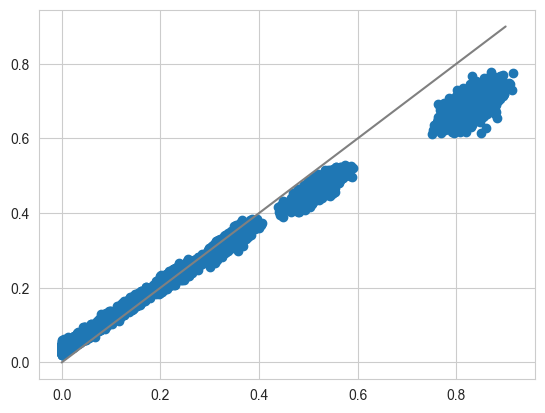

In [95]:
flat_mi_results = []
for l in all_mi_list:
    flat_mi_results.extend(l)
plt.plot(I_from_pearson, flat_mi_results, "o")
plt.plot([0,0.9], [0, 0.9], color="gray")
plt.show()

### b)

#### bp 1)

In [11]:
# again: this is too time consuming so here is an answer

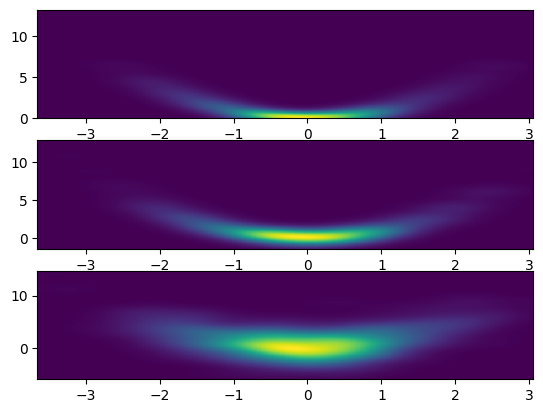

In [12]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [112]:
eps_list = np.exp(np.linspace(0, 1, 10))

ro_to_m_info_list = {rho_index: list() for rho_index in range(len(rho_list))}
ro_to_pearson_list = {rho_index: list() for rho_index in range(len(rho_list))}

for i in range(N):
    data_list = []
    for rho, eps in zip(rho_list, eps_list):
        x = np.random.normal(0, 1, n)
        y = x**2 + np.random.normal(0, eps, n)
        data_list.append(np.vstack([x, y]).T)
    for idx, data in enumerate(data_list):
        mut_info, pearson = compute_p_and_m(data)
        ro_to_m_info_list[idx].append(mut_info)
        ro_to_pearson_list[idx].append(pearson.statistic)

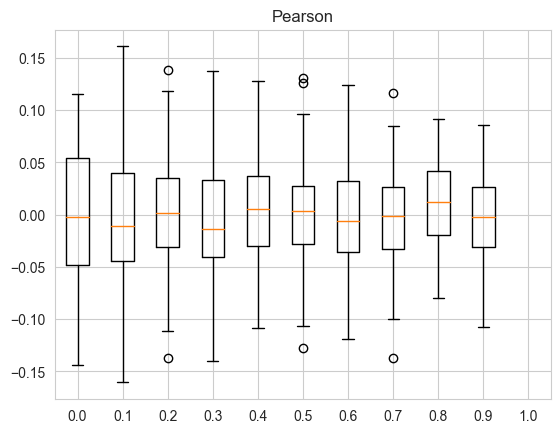

In [113]:
plt.title("Pearson")
plt.boxplot(ro_to_pearson_list.values(), vert=True, labels= np.round(rho_list, 1))
plt.show()

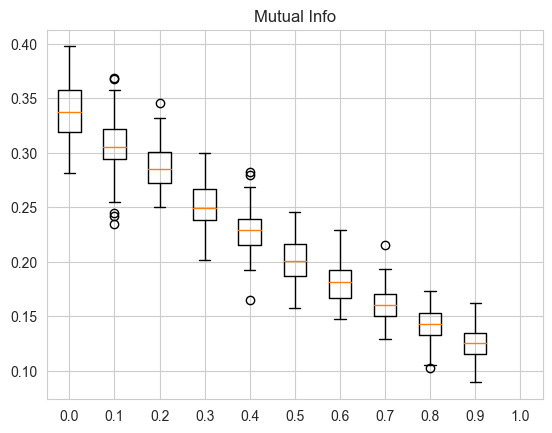

In [114]:
plt.title("Mutual Info")
plt.boxplot(ro_to_m_info_list.values(), vert=True, labels=np.round(rho_list, 1))
plt.show()

## Task 2

### a)

In [115]:
def indep_test_asymptotic(X, Y, stat):
    x_bins = np.linspace(X.min(), X.max(), 10)
    y_bins = np.linspace(Y.min(), Y.max(), 10)
    x_discrete = np.digitize(X, bins=x_bins)
    y_discrete = np.digitize(Y, bins=y_bins)
    if stat == "mi":

        stat_value = 2*len(X)*mutual_info_score(x_discrete, y_discrete)

    if stat == "chi2":

        test_res = (chi2_contingency(pd.crosstab(x_discrete, y_discrete)))
        stat_value = test_res.statistic

    df = (len(np.unique(x_discrete)) - 1)*(len(np.unique(y_discrete)) - 1)

    p_value = 1 - chi2.cdf(stat_value, df=df)

    return stat_value, p_value

### b)

In [116]:
def indep_test_permutation(X, Y, B, stat="mi"):
    x_bins = np.linspace(X.min(), X.max(), 10)
    y_bins = np.linspace(Y.min(), Y.max(), 10)
    x_discrete = np.digitize(X, bins=x_bins)
    y_discrete = np.digitize(Y, bins=y_bins)

    stat_value = mutual_info_score(x_discrete, y_discrete)

    condition_p_value = 0
    for b in range(B):
        X_b = np.random.permutation(x_discrete)

        stat_value_b = mutual_info_score(X_b, y_discrete)

        if stat_value <= stat_value_b:
            condition_p_value += 1

    p_value = (1 + condition_p_value)/(1 + B)

    return 2*len(x_discrete)*stat_value, p_value

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [122]:
# independent r.v. - we expect that our tests don't reject the null hypothesis
n = 1000
ro = 0
data = np.random.multivariate_normal(np.zeros(2), np.array([[1, ro], [ro, 1]]), n)
print("Asymptotic independence test, stat MI: p_value: "+ str(indep_test_asymptotic(data[:,0], data[:,1], "mi")[1]))
print("Asymptotic independence test, stat X^2: p_value: "+ str(indep_test_asymptotic(data[:,0], data[:,1], "chi2")[1]))

print("Permutation independence test: p_value: "+ str(indep_test_permutation(data[:,0], data[:,1], 1000)[1]))

Asymptotic independence test, stat MI: p_value: 0.9377286522656815
Asymptotic independence test, stat X^2: p_value: 0.07511966713318519
Permutation independence test: p_value: 0.6373626373626373


**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [125]:
# independent r.v. - ideally we will reject the null hypothesis
n = 1000
ro = 0.3
data = np.random.multivariate_normal(np.zeros(2), np.array([[1, ro], [ro, 1]]), n)
print("Asymptotic independence test, stat MI: p_value: "+ str(indep_test_asymptotic(data[:,0], data[:,1], "mi")[1]))
print("Asymptotic independence test, stat X^2: p_value: "+ str(indep_test_asymptotic(data[:,0], data[:,1], "chi2")[1]))

print("Permutation independence test: p_value: "+ str(indep_test_permutation(data[:,0], data[:,1], 1000)[1]))

Asymptotic independence test, stat MI: p_value: 3.0117184302014266e-09
Asymptotic independence test, stat X^2: p_value: 3.4703029339056e-10
Permutation independence test: p_value: 0.000999000999000999
